In [ ]:
# Celda 1
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [ ]:
# Celda 2
from tensorflow.keras.datasets import boston_housing

# Cargar los datos (ya divididos en entrenamiento y prueba)
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Mostrar el tamaño de los datos
print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de prueba:", x_test.shape)


Tamaño del set de entrenamiento: (404, 13)
Tamaño del set de prueba: (102, 13)


In [ ]:
# Celda 3
print("Ejemplo de características:", x_train[0])
print("Precio real de esta casa:", y_train[0])


Ejemplo de características: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Precio real de esta casa: 15.2


In [ ]:
# Celda 4
# Calcular media y desviación del set de entrenamiento
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

# Normalizar (escalar entre -1 y 1)
x_train_norm = (x_train - mean) / std
x_test_norm = (x_test - mean) / std


In [ ]:
# Celda 5
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Solo 1 salida: el precio
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Celda 6
historial = model.fit(
    x_train_norm, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 576.7396 - mae: 22.0795 - val_loss: 594.8180 - val_mae: 22.5413
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 546.9797 - mae: 21.1849 - val_loss: 510.5315 - val_mae: 20.5399
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 412.1973 - mae: 17.8800 - val_loss: 375.5873 - val_mae: 17.0279
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 290.2069 - mae: 14.5809 - val_loss: 202.2742 - val_mae: 11.8760
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 122.9201 - mae: 9.1197 - val_loss: 81.3828 - val_mae: 6.7059
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 41.9255 - mae: 4.8738 - val_loss: 52.7014 - val_mae: 5.3211
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 45.7917 - mae: 4.4249 - val_loss: 38.6830 - val_mae: 4.5927
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.8673 - mae: 3.9668 - val_loss: 31.5362 - val_mae: 4.1160
Epoch 9/100
21/21 ━━━━━━━━

In [ ]:
# Celda 7
resultado = model.evaluate(x_test_norm, y_test)
print("\nPérdida (MSE):", resultado[0])
print("Error absoluto medio (MAE):", resultado[1])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.2157 - mae: 2.7352 

Pérdida (MSE): 20.763267517089844
Error absoluto medio (MAE): 2.9260504245758057


In [ ]:
# Celda 8
prediccion = model.predict(np.array([x_test_norm[0]]))
print("Precio real:", y_test[0])
print("Precio predicho:", prediccion[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Precio real: 7.2
Precio predicho: 9.759726


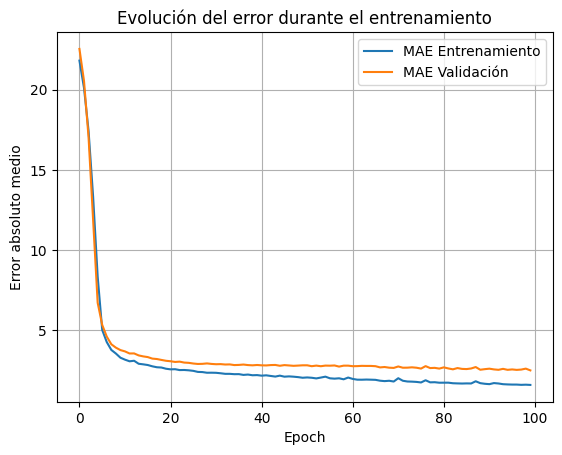

In [ ]:
# Celda 9
plt.plot(historial.history['mae'], label='MAE Entrenamiento')
plt.plot(historial.history['val_mae'], label='MAE Validación')
plt.xlabel('Epoch')
plt.ylabel('Error absoluto medio')
plt.title('Evolución del error durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()
